In [1]:
#Dependencies
import pandas as pd
from random import randint
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat


In [2]:
# Reading the data for 2019
file = "resources/nyts2019.csv"
df2019 = pd.read_csv(file)
df2019.head()



,psu,StudentLoginID,Q1,Q2,Q3,Q5A,Q5B,Q5C,Q5D,Q5E,...,Q35,Q77,Q89,Q90,Q91,Q92,Q93,Q94,Q95,Q96
0,58123,25830,7,2,4,.N,.N,.N,.N,.N,...,.S,1,3,3,5,4,3,3,4,3
1,58123,25831,8,1,4,NaN,NaN,NaN,NaN,1,...,.S,1,3,1,3,5,4,1,4,3
2,58123,25832,6,1,4,1,1,NaN,NaN,NaN,...,.S,1,5,1,3,4,4,1,3,3
3,58123,25833,6,1,4,.N,.N,.N,.N,.N,...,.S,1,3,1,4,4,2,1,2,2
4,58123,25834,7,1,4,NaN,NaN,NaN,NaN,1,...,.S,1,6,6,6,6,6,6,6,6


In [3]:
# Rename columns so that they are differentiated
df_2019 = df2019.rename(columns={"Q1": "age", "Q2": "gender", "Q3": "grade",
                                "Q5A": "race_a", "Q5B": "race_b", "Q5C": "race_c", 
                                "Q5D": "race_d", "Q5E": "race_e", "Q6": "try_cig", "Q7": "age_cig", 
                                 "Q8": "cig", "Q34": "try_vap", 
                                "Q35": "age_vap", "Q77": "real_cost", 
                                "Q89": "internetAd_cig", "Q90": "printAd_cig", 
                                "Q91": "storeAd_cig", "Q92": "streamAd_cig", 
                                "Q93": "internetAd_vap", "Q94": "printAd_vap", 
                                "Q95": "storeAd_vap", "Q96": "streamAd_vap"})
df_2019.head()

,psu,StudentLoginID,age,gender,grade,race_a,race_b,race_c,race_d,race_e,...,age_vap,real_cost,internetAd_cig,printAd_cig,storeAd_cig,streamAd_cig,internetAd_vap,printAd_vap,storeAd_vap,streamAd_vap
0,58123,25830,7,2,4,.N,.N,.N,.N,.N,...,.S,1,3,3,5,4,3,3,4,3
1,58123,25831,8,1,4,NaN,NaN,NaN,NaN,1,...,.S,1,3,1,3,5,4,1,4,3
2,58123,25832,6,1,4,1,1,NaN,NaN,NaN,...,.S,1,5,1,3,4,4,1,3,3
3,58123,25833,6,1,4,.N,.N,.N,.N,.N,...,.S,1,3,1,4,4,2,1,2,2
4,58123,25834,7,1,4,NaN,NaN,NaN,NaN,1,...,.S,1,6,6,6,6,6,6,6,6


In [4]:
# Recoding Race using the given codebook information
# A- American Indian or alaskan native
# B - Asian
# C - Black or African American
# D - Native Hawaiian or Other Pacific Islander
# E - White
# Planning to make "race" a sring with 3 values- "Black", "white" and "Other". 

#Defining a function for combining the dummy race variables to one race column
def f(row):
    if row["race_a"] == "1":
        val = "Other"
    elif row["race_b"] == "1":
        val = "Other"
    elif row["race_d"] == "1":
        val = "Other"
    elif row['race_c'] == "1":
        val = "Black"
    elif row["race_e"] == "1":
        val = "White"
    else:
        val = np.nan
    return val
        
# Creating a new column race using the above function
df_2019['Race'] = df_2019.apply(f, axis=1)

# Viewing the dataframe
df_2019

# Deleting columns race_a through race_e
df_2019_recoded = df_2019.drop(['psu','race_a', 'race_b', 'race_c', 'race_d', 'race_e'], axis = 1)

df_2019_recoded

,StudentLoginID,age,gender,grade,try_cig,age_cig,cig,try_vap,age_vap,real_cost,internetAd_cig,printAd_cig,storeAd_cig,streamAd_cig,internetAd_vap,printAd_vap,storeAd_vap,streamAd_vap,Race
0,25830,7,2,4,2,.S,.S,2,.S,1,3,3,5,4,3,3,4,3,NaN
1,25831,8,1,4,2,.S,.S,2,.S,1,3,1,3,5,4,1,4,3,White
2,25832,6,1,4,2,.S,.S,2,.S,1,5,1,3,4,4,1,3,3,Other
3,25833,6,1,4,2,.S,.S,2,.S,1,3,1,4,4,2,1,2,2,NaN
4,25834,7,1,4,2,.S,.S,2,.S,1,6,6,6,6,6,6,6,6,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19013,17553,5,2,3,2,.S,.S,2,.S,1,3,4,4,3,4,3,3,3,White
19014,17554,6,1,3,2,.S,.S,2,.S,1,4,1,2,3,5,1,2,3,White
19015,17558,6,2,3,2,.S,.S,1,7,1,2,1,5,3,5,1,3,3,White
19016,17559,5,1,3,2,.S,.S,2,.S,1,3,1,4,3,3,1,3,3,Other


In [5]:
# Recoding the cigarette smoking and vaping variables to yes or no as the final dependant variables of interest
# for the variable try_cig, replacing the values .N and .Z to NA
# yes is coded as 1 and No is coded as 2 as per the codebook


df_2019_recoded['try_cig'] = df_2019_recoded['try_cig'].replace(['.N','.Z', '1', '2'],[np.nan, np.nan, 'yes', 'no'])
#df_2019_recoded

# Recoding the age when the student first started cigerette smoking
# According to the codebook: 1 is 8 yrs old, 2 is 9 years, 3 is 10 years and so forth. so replacing these values with the correct ages

df_2019_recoded['age_cig'] = df_2019_recoded['age_cig'].replace(['.N','.S', '.Z'],np.nan)
df_2019_recoded['age_cig'] = df_2019_recoded['age_cig'].replace(['1', '2', '3', '4', '5', '6', '7', '8', '9',
                                                                '10', '11', '12'],['8', '9', '10', '11', '12', '13','14',
                                                                                '15','16', '17','18', '19'])
#df_2019_recoded

# Recoding the age of the student surveyed
# According to the codebook: 1 is 8 yrs old, 2 is 9 years, 3 is 10 years and so forth. so replacing these values with the correct ages
df_2019_recoded['age'] = df_2019_recoded['age'].replace(['.N'],np.nan)
df_2019_recoded['age'] = df_2019_recoded['age'].replace(['1', '2', '3', '4', '5', '6', '7', '8', '9',
                                                                '10', '11'],['9', '10', '11', '12', '13','14',
                                                                                  '15','16', '17','18', '19'])
#df_2019_recoded

# Recoding gender
df_2019_recoded['gender'] = df_2019_recoded['gender'].replace(['.N', '1', '2'],[np.nan, 'male', 'female'])
df_2019_recoded

#Recoding grade
# According to codebook 1 is 6th grade, 2 is 7th grade and so on.
df_2019_recoded['grade'] = df_2019_recoded['grade'].replace(['.N', '1', '2','3', '4', '5', '6', '7', '8'],
                                                            [np.nan, '6', '7', '8', '9','10', '11', '12','Other'])
df_2019_recoded


,StudentLoginID,age,gender,grade,try_cig,age_cig,cig,try_vap,age_vap,real_cost,internetAd_cig,printAd_cig,storeAd_cig,streamAd_cig,internetAd_vap,printAd_vap,storeAd_vap,streamAd_vap,Race
0,25830,15,female,9,no,NaN,.S,2,.S,1,3,3,5,4,3,3,4,3,NaN
1,25831,16,male,9,no,NaN,.S,2,.S,1,3,1,3,5,4,1,4,3,White
2,25832,14,male,9,no,NaN,.S,2,.S,1,5,1,3,4,4,1,3,3,Other
3,25833,14,male,9,no,NaN,.S,2,.S,1,3,1,4,4,2,1,2,2,NaN
4,25834,15,male,9,no,NaN,.S,2,.S,1,6,6,6,6,6,6,6,6,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19013,17553,13,female,8,no,NaN,.S,2,.S,1,3,4,4,3,4,3,3,3,White
19014,17554,14,male,8,no,NaN,.S,2,.S,1,4,1,2,3,5,1,2,3,White
19015,17558,14,female,8,no,NaN,.S,1,7,1,2,1,5,3,5,1,3,3,White
19016,17559,13,male,8,no,NaN,.S,2,.S,1,3,1,4,3,3,1,3,3,Other


In [6]:
# Coding the number of ciggrettes smoked as smoker or non-smoker
#Based on the CDC definition, Current smoker: An adult who has smoked 100 cigarettes in his or her lifetime and who currently smokes cigarettes.
# (https://www.cdc.gov/nchs/nhis/tobacco/tobacco_glossary.htm). we are using the same criteria for our group.

df_2019_recoded['cig'] = df_2019_recoded['cig'].replace(['.N', '.S', '.Z'],
                                                            np.nan)

df_2019_recoded['cig'] = df_2019_recoded['cig'].replace(['1', '2','3', '4', '5', '6'],
                                                            'Non-smoker')

df_2019_recoded['cig'] = df_2019_recoded['cig'].replace(['7'], 'Smoker')     
df_2019_recoded

,StudentLoginID,age,gender,grade,try_cig,age_cig,cig,try_vap,age_vap,real_cost,internetAd_cig,printAd_cig,storeAd_cig,streamAd_cig,internetAd_vap,printAd_vap,storeAd_vap,streamAd_vap,Race
0,25830,15,female,9,no,NaN,NaN,2,.S,1,3,3,5,4,3,3,4,3,NaN
1,25831,16,male,9,no,NaN,NaN,2,.S,1,3,1,3,5,4,1,4,3,White
2,25832,14,male,9,no,NaN,NaN,2,.S,1,5,1,3,4,4,1,3,3,Other
3,25833,14,male,9,no,NaN,NaN,2,.S,1,3,1,4,4,2,1,2,2,NaN
4,25834,15,male,9,no,NaN,NaN,2,.S,1,6,6,6,6,6,6,6,6,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19013,17553,13,female,8,no,NaN,NaN,2,.S,1,3,4,4,3,4,3,3,3,White
19014,17554,14,male,8,no,NaN,NaN,2,.S,1,4,1,2,3,5,1,2,3,White
19015,17558,14,female,8,no,NaN,NaN,1,7,1,2,1,5,3,5,1,3,3,White
19016,17559,13,male,8,no,NaN,NaN,2,.S,1,3,1,4,3,3,1,3,3,Other


In [7]:
# Similarly recoding vaping values
df_2019_recoded['try_vap'] = df_2019_recoded['try_vap'].replace(['.N','.Z', '1', '2'],[np.nan, np.nan, 'yes', 'no'])
df_2019_recoded

# Recoding the age when the student first started vaping
# According to the codebook: 1 is 8 yrs old, 2 is 9 years, 3 is 10 years and so forth. so replacing these values with the correct ages

df_2019_recoded['age_vap'] = df_2019_recoded['age_vap'].replace(['.N','.S','.Z'],np.nan)
df_2019_recoded['age_vap'] = df_2019_recoded['age_vap'].replace(['1', '2', '3', '4', '5', '6', '7', '8', '9',
                                                                '10', '11', '12'],['8', '9', '10', '11', '12', '13','14',
                                                                                '15','16', '17','18', '19'])
df_2019_recoded

,StudentLoginID,age,gender,grade,try_cig,age_cig,cig,try_vap,age_vap,real_cost,internetAd_cig,printAd_cig,storeAd_cig,streamAd_cig,internetAd_vap,printAd_vap,storeAd_vap,streamAd_vap,Race
0,25830,15,female,9,no,NaN,NaN,no,NaN,1,3,3,5,4,3,3,4,3,NaN
1,25831,16,male,9,no,NaN,NaN,no,NaN,1,3,1,3,5,4,1,4,3,White
2,25832,14,male,9,no,NaN,NaN,no,NaN,1,5,1,3,4,4,1,3,3,Other
3,25833,14,male,9,no,NaN,NaN,no,NaN,1,3,1,4,4,2,1,2,2,NaN
4,25834,15,male,9,no,NaN,NaN,no,NaN,1,6,6,6,6,6,6,6,6,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19013,17553,13,female,8,no,NaN,NaN,no,NaN,1,3,4,4,3,4,3,3,3,White
19014,17554,14,male,8,no,NaN,NaN,no,NaN,1,4,1,2,3,5,1,2,3,White
19015,17558,14,female,8,no,NaN,NaN,yes,14,1,2,1,5,3,5,1,3,3,White
19016,17559,13,male,8,no,NaN,NaN,no,NaN,1,3,1,4,3,3,1,3,3,Other


In [8]:
#Recoding real cost - (have you heard about the real cost of smoking on tv, internet, social media or radio)
df_2019_recoded['real_cost'] = df_2019_recoded['real_cost'].replace(['.N','.Z', '1', '2', '3'],
                                                                    [np.nan,np.nan,'yes','no', 'not sure'])
df_2019_recoded

,StudentLoginID,age,gender,grade,try_cig,age_cig,cig,try_vap,age_vap,real_cost,internetAd_cig,printAd_cig,storeAd_cig,streamAd_cig,internetAd_vap,printAd_vap,storeAd_vap,streamAd_vap,Race
0,25830,15,female,9,no,NaN,NaN,no,NaN,yes,3,3,5,4,3,3,4,3,NaN
1,25831,16,male,9,no,NaN,NaN,no,NaN,yes,3,1,3,5,4,1,4,3,White
2,25832,14,male,9,no,NaN,NaN,no,NaN,yes,5,1,3,4,4,1,3,3,Other
3,25833,14,male,9,no,NaN,NaN,no,NaN,yes,3,1,4,4,2,1,2,2,NaN
4,25834,15,male,9,no,NaN,NaN,no,NaN,yes,6,6,6,6,6,6,6,6,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19013,17553,13,female,8,no,NaN,NaN,no,NaN,yes,3,4,4,3,4,3,3,3,White
19014,17554,14,male,8,no,NaN,NaN,no,NaN,yes,4,1,2,3,5,1,2,3,White
19015,17558,14,female,8,no,NaN,NaN,yes,14,yes,2,1,5,3,5,1,3,3,White
19016,17559,13,male,8,no,NaN,NaN,no,NaN,yes,3,1,4,3,3,1,3,3,Other


In [9]:
#Internet Ad for cig
# When you are using the Internet, how often do you see ads or promotions for cigarettes or other tobacco products?
# Codebook has a likert scale question for this with N Displayed, Not Answered, .Z Not Displayed, 1-I do not use the Internet 415 2 2.2
#2 Never, 3 Rarely, 4 Sometimes, 5 Most of the time, 6 Always
# We will recode this into 3 scale variable. 

df_2019_recoded['internetAd_cig'] = df_2019_recoded['internetAd_cig'].replace(['.N','.Z'], np.nan)
df_2019_recoded['internetAd_cig'] = df_2019_recoded['internetAd_cig'].replace(['1','2'], 'no')
df_2019_recoded['internetAd_cig'] = df_2019_recoded['internetAd_cig'].replace(['3','4'], 'sometimes')
df_2019_recoded['internetAd_cig'] = df_2019_recoded['internetAd_cig'].replace(['5','6'], 'often')

df_2019_recoded

#Print ads -  When you read newspapers or magazines, how often do you see ads or promotions for cigarettes or other tobacco products?
 
df_2019_recoded['printAd_cig'] = df_2019_recoded['printAd_cig'].replace(['.N','.Z'], np.nan)
df_2019_recoded['printAd_cig'] = df_2019_recoded['printAd_cig'].replace(['1','2'], 'no')
df_2019_recoded['printAd_cig'] = df_2019_recoded['printAd_cig'].replace(['3','4'], 'sometimes')
df_2019_recoded['printAd_cig'] = df_2019_recoded['printAd_cig'].replace(['5','6'], 'often')

df_2019_recoded

# Store ads -  When you go to a convenience store, supermarket, or gas station, how often do you see ads or promotions for cigarettes
#or other tobacco products?

df_2019_recoded['storeAd_cig'] = df_2019_recoded['storeAd_cig'].replace(['.N','.Z'], np.nan)
df_2019_recoded['storeAd_cig'] = df_2019_recoded['storeAd_cig'].replace(['1','2'], 'no')
df_2019_recoded['storeAd_cig'] = df_2019_recoded['storeAd_cig'].replace(['3','4'], 'sometimes')
df_2019_recoded['storeAd_cig'] = df_2019_recoded['storeAd_cig'].replace(['5','6'], 'often')

df_2019_recoded

# Stream ads -  When you watch TV or streaming services (such as Netflix, Hulu, or Amazon Prime), or go to the movies, how often do you
#see ads or promotions for cigarettes or other tobacco products?

df_2019_recoded['streamAd_cig'] = df_2019_recoded['streamAd_cig'].replace(['.N','.Z'], np.nan)
df_2019_recoded['streamAd_cig'] = df_2019_recoded['streamAd_cig'].replace(['1','2'], 'no')
df_2019_recoded['streamAd_cig'] = df_2019_recoded['streamAd_cig'].replace(['3','4'], 'sometimes')
df_2019_recoded['streamAd_cig'] = df_2019_recoded['streamAd_cig'].replace(['5','6'], 'often')

df_2019_recoded

,StudentLoginID,age,gender,grade,try_cig,age_cig,cig,try_vap,age_vap,real_cost,internetAd_cig,printAd_cig,storeAd_cig,streamAd_cig,internetAd_vap,printAd_vap,storeAd_vap,streamAd_vap,Race
0,25830,15,female,9,no,NaN,NaN,no,NaN,yes,sometimes,sometimes,often,sometimes,3,3,4,3,NaN
1,25831,16,male,9,no,NaN,NaN,no,NaN,yes,sometimes,no,sometimes,often,4,1,4,3,White
2,25832,14,male,9,no,NaN,NaN,no,NaN,yes,often,no,sometimes,sometimes,4,1,3,3,Other
3,25833,14,male,9,no,NaN,NaN,no,NaN,yes,sometimes,no,sometimes,sometimes,2,1,2,2,NaN
4,25834,15,male,9,no,NaN,NaN,no,NaN,yes,often,often,often,often,6,6,6,6,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19013,17553,13,female,8,no,NaN,NaN,no,NaN,yes,sometimes,sometimes,sometimes,sometimes,4,3,3,3,White
19014,17554,14,male,8,no,NaN,NaN,no,NaN,yes,sometimes,no,no,sometimes,5,1,2,3,White
19015,17558,14,female,8,no,NaN,NaN,yes,14,yes,no,no,often,sometimes,5,1,3,3,White
19016,17559,13,male,8,no,NaN,NaN,no,NaN,yes,sometimes,no,sometimes,sometimes,3,1,3,3,Other


In [10]:
#Ad for vaping 
# When you are using the Internet, how often do you see ads or promotions for  e-cigarettes?
# Codebook has a likert scale question for this with N Displayed, Not Answered, .Z Not Displayed, 1-I do not use the Internet 415 2 2.2
#2 Never, 3 Rarely, 4 Sometimes, 5 Most of the time, 6 Always
# We will recode this into 3 scale variable. 

df_2019_recoded['internetAd_vap'] = df_2019_recoded['internetAd_vap'].replace(['.N','.Z'], np.nan)
df_2019_recoded['internetAd_vap'] = df_2019_recoded['internetAd_vap'].replace(['1','2'], 'no')
df_2019_recoded['internetAd_vap'] = df_2019_recoded['internetAd_vap'].replace(['3','4'], 'sometimes')
df_2019_recoded['internetAd_vap'] = df_2019_recoded['internetAd_vap'].replace(['5','6'], 'often')

df_2019_recoded

#Print ads -  When you read newspapers or magazines, how often do you see ads or promotions for  e-cigarettes?
 
df_2019_recoded['printAd_vap'] = df_2019_recoded['printAd_vap'].replace(['.N','.Z'], np.nan)
df_2019_recoded['printAd_vap'] = df_2019_recoded['printAd_vap'].replace(['1','2'], 'no')
df_2019_recoded['printAd_vap'] = df_2019_recoded['printAd_vap'].replace(['3','4'], 'sometimes')
df_2019_recoded['printAd_vap'] = df_2019_recoded['printAd_vap'].replace(['5','6'], 'often')

df_2019_recoded

# Store ads -  When you go to a convenience store, supermarket, or gas station, how often do you see ads or promotions for  e-cigarettes


df_2019_recoded['storeAd_vap'] = df_2019_recoded['storeAd_vap'].replace(['.N','.Z'], np.nan)
df_2019_recoded['storeAd_vap'] = df_2019_recoded['storeAd_vap'].replace(['1','2'], 'no')
df_2019_recoded['storeAd_vap'] = df_2019_recoded['storeAd_vap'].replace(['3','4'], 'sometimes')
df_2019_recoded['storeAd_vap'] = df_2019_recoded['storeAd_vap'].replace(['5','6'], 'often')

df_2019_recoded

# Stream ads -  When you watch TV or streaming services (such as Netflix, Hulu, or Amazon Prime), or go to the movies, how often do you
#see ads or promotions for  e-cigarettes?

df_2019_recoded['streamAd_vap'] = df_2019_recoded['streamAd_vap'].replace(['.N','.Z'], np.nan)
df_2019_recoded['streamAd_vap'] = df_2019_recoded['streamAd_vap'].replace(['1','2'], 'no')
df_2019_recoded['streamAd_vap'] = df_2019_recoded['streamAd_vap'].replace(['3','4'], 'sometimes')
df_2019_recoded['streamAd_vap'] = df_2019_recoded['streamAd_vap'].replace(['5','6'], 'often')

df_2019_recoded

,StudentLoginID,age,gender,grade,try_cig,age_cig,cig,try_vap,age_vap,real_cost,internetAd_cig,printAd_cig,storeAd_cig,streamAd_cig,internetAd_vap,printAd_vap,storeAd_vap,streamAd_vap,Race
0,25830,15,female,9,no,NaN,NaN,no,NaN,yes,sometimes,sometimes,often,sometimes,sometimes,sometimes,sometimes,sometimes,NaN
1,25831,16,male,9,no,NaN,NaN,no,NaN,yes,sometimes,no,sometimes,often,sometimes,no,sometimes,sometimes,White
2,25832,14,male,9,no,NaN,NaN,no,NaN,yes,often,no,sometimes,sometimes,sometimes,no,sometimes,sometimes,Other
3,25833,14,male,9,no,NaN,NaN,no,NaN,yes,sometimes,no,sometimes,sometimes,no,no,no,no,NaN
4,25834,15,male,9,no,NaN,NaN,no,NaN,yes,often,often,often,often,often,often,often,often,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19013,17553,13,female,8,no,NaN,NaN,no,NaN,yes,sometimes,sometimes,sometimes,sometimes,sometimes,sometimes,sometimes,sometimes,White
19014,17554,14,male,8,no,NaN,NaN,no,NaN,yes,sometimes,no,no,sometimes,often,no,no,sometimes,White
19015,17558,14,female,8,no,NaN,NaN,yes,14,yes,no,no,often,sometimes,often,no,sometimes,sometimes,White
19016,17559,13,male,8,no,NaN,NaN,no,NaN,yes,sometimes,no,sometimes,sometimes,sometimes,no,sometimes,sometimes,Other


In [11]:
#df_2019_recoded.dropna(how = 'any')

In [12]:
# using dropna() function   
#df_2019_recoded.dropna(subset = ['cig']) 
#df_clean = df_2019_recoded[df_2019_recoded['try_vap'].notnull()]
#df_clean

In [13]:
df_2019_recoded.columns

Index(['StudentLoginID', 'age', 'gender', 'grade', 'try_cig', 'age_cig', 'cig',
       'try_vap', 'age_vap', 'real_cost', 'internetAd_cig', 'printAd_cig',
       'storeAd_cig', 'streamAd_cig', 'internetAd_vap', 'printAd_vap',
       'storeAd_vap', 'streamAd_vap', 'Race'],
      dtype='object')

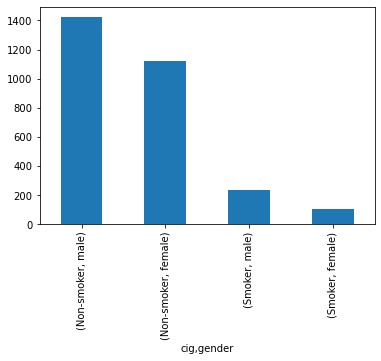

In [14]:
## Analysis
# Looking at all numbers 

#Creating groups
#smoker_df = df_2019_recoded.groupby(['cig'])
#e_cig_df = df_2019_recoded.groupby(['try_vap'])

gender =  df_2019_recoded['gender'].value_counts()
gender

# Looking at smokers and non- smokers
smokers =  df_2019_recoded['cig'].value_counts()
smokers

e_cig = df_2019_recoded['try_vap'].value_counts()
e_cig

#Creating groups
smoker_df = df_2019_recoded.groupby(['cig'])
e_cig_df = df_2019_recoded.groupby(['try_vap'])

gender_s =  smoker_df['gender'].value_counts()
gender_s

#cig smokers by gender
gender_s.plot(kind = 'bar')

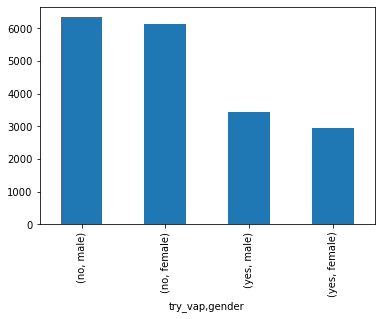

In [15]:
#ecig smokers by gender
gender_v =  e_cig_df['gender'].value_counts()
gender_v
gender_v.plot(kind = 'bar')

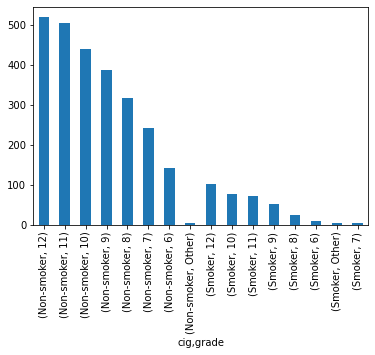

In [17]:
#cig smoker by grade
grade_cig = smoker_df['grade'].value_counts()
grade_cig
grade_cig.plot(kind = 'bar')

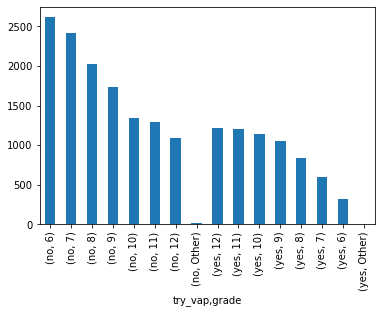

In [18]:
#e-cig smoker by grade
grade_ecig = e_cig_df['grade'].value_counts()
grade_ecig
grade_ecig.plot(kind = 'bar')

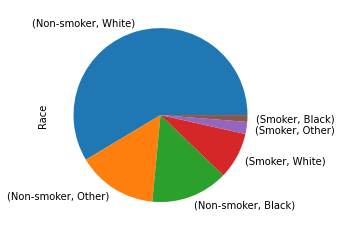

In [20]:
#cig smoker by race
race_cig = smoker_df['Race'].value_counts()
race_cig
race_cig.plot(kind = 'pie')

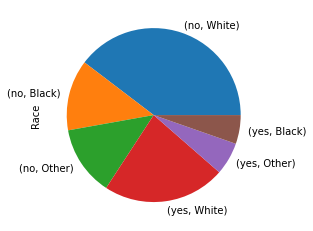

In [21]:
#e-cig smoker by race
race_ecig = e_cig_df['Race'].value_counts()
race_ecig
race_ecig.plot(kind = 'pie')

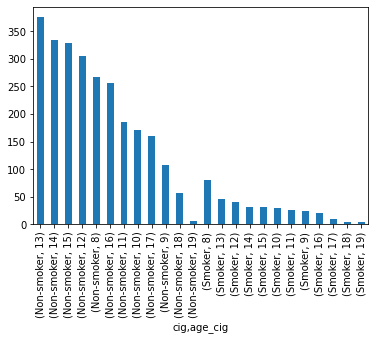

In [25]:
#cig smoker by age
age_cig = smoker_df['age_cig'].value_counts()
age_cig
age_cig.plot(kind = 'bar')

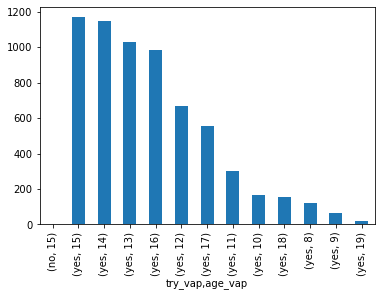

In [24]:
#e-cig smoker by age
age_ecig = e_cig_df['age_vap'].value_counts()
age_ecig
age_ecig.plot(kind = 'bar')